# 随机数、作图

In [3]:
using Plots

## 噪声

In [5]:
rst = rand(10)

10-element Array{Float64,1}:
 0.20073292183886315 
 0.3869951293668301  
 0.41736615045029213 
 0.007685078059350259
 0.1645489299709213  
 0.7733131373294488  
 0.5901053606445856  
 0.3368096950204431  
 0.08289065520956052 
 0.0694266044931986  

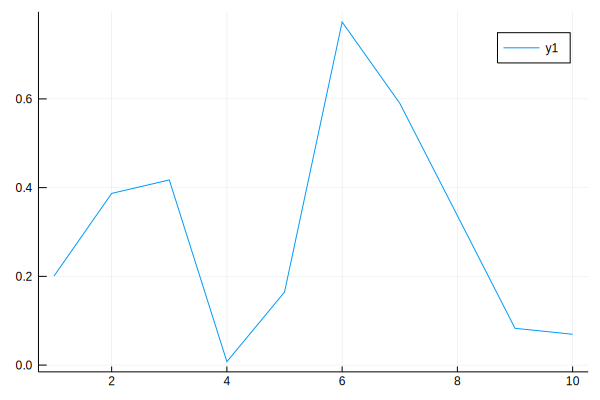

In [6]:
plot(rst)

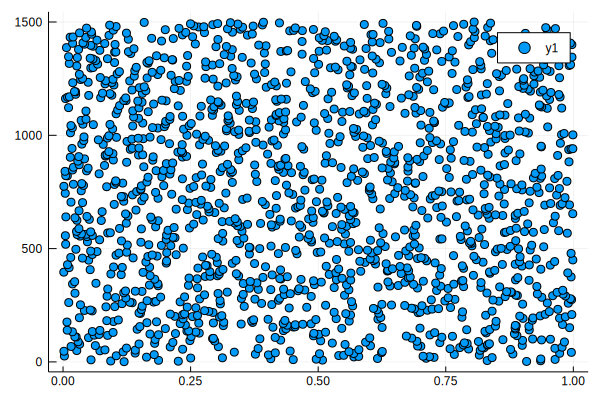

In [7]:
scatter(rand(1500), 1:1500)

In [16]:
@gif for i in 1:60
    rst = rand(1000)
    fig1 = scatter(rst, 1:1000, legend=false)
    fig2 = histogram(rst, ylim=(0, 130))
    plot(fig1, fig2, layout=(1,2), leg=false)
end

┌ Info: Saved animation to 
│   fn = C:\Users\xijia\Documents\Notebooks\tmp.gif
└ @ Plots C:\Users\xijia\.julia\packages\Plots\Iuc9S\src\animation.jl:95


Plots.AnimatedGif("C:\\Users\\xijia\\Documents\\Notebooks\\tmp.gif")

- 以上 `rand()`，默认产生服从 [0, 1] 分布的随机数。
- 正态分布的随机数可以用 `randn()`，也可以用 Distributions 中的 `Normal()`

In [10]:
using Distributions

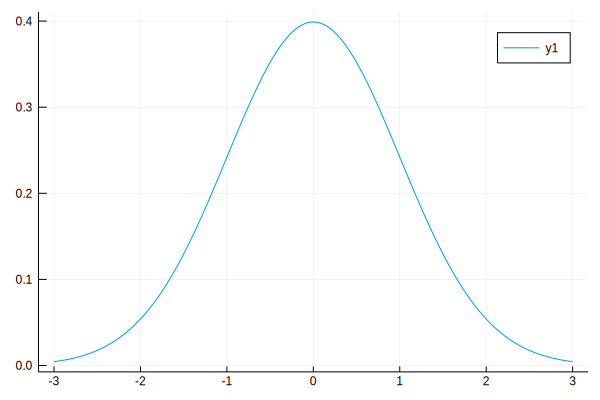

In [13]:
plot([x -> pdf(Normal(), x)], -3:.01:3)

# 线性代数、最小二乘

In [21]:
using LinearAlgebra, Statistics

In [18]:
lhs = [1 1; 2 4]
rhs = [35; 94]

2-element Array{Int64,1}:
 35
 94

In [19]:
鸡兔 = lhs \ rhs

2-element Array{Float64,1}:
 23.0
 12.0

In [20]:
inv(lhs)*rhs

2-element Array{Float64,1}:
 23.0
 12.0

### 能够做最小二乘的基因组选择

In [24]:
nid = 1000
nlc = 100
X = rand(0:2, nid, nlc)
g = randn(nlc)/sqrt(nlc*2)
tbv = X*g
vg = var(tbv)
println(vg)

0.3198659999512662


In [25]:
h2 = .5
σe = sqrt((1-h2)/h2*vg)
err = randn(nid)*σe
pht = tbv + err
vp = var(pht)
println(vp)

0.6167823876431037


In [26]:
ghat = X'X\(X'pht)

100-element Array{Float64,1}:
 -0.014597408789514895
 -0.1365302510031581  
 -0.007536863881427439
 -0.05581519409333353 
  0.045202055237313715
  0.06913698820317277 
 -0.05073366763040129 
 -0.040875959222317106
  0.09474772240217236 
  0.07030675074725945 
 -0.04855737913322636 
  0.09581929539898577 
  0.06117025789141544 
  ⋮                   
 -0.017628874866732338
 -0.033277605065866196
  0.08837364266104585 
  0.027111595683380375
  0.019084358747536705
  0.0236545656313445  
  0.04885583143276048 
  0.001222140556498132
  0.045119799751823786
 -0.11460149448301779 
  0.09344449014727174 
 -0.0173088943694874  

In [31]:
ebv = X*ghat

1000-element Array{Float64,1}:
  0.3332638368922135  
  0.07742573298444097 
  0.6170840215786005  
  0.5751979752863634  
 -0.05400558964654157 
 -0.35440306021970563 
  0.544899564752336   
  0.30617211104975195 
  1.2989206628100025  
  0.3633445869779526  
  0.027507835000448906
  0.1728402709081453  
  0.8493420387603202  
  ⋮                   
 -0.10401625283530974 
  0.5124429903964071  
  0.4361875905960715  
  0.18068081316616116 
  0.47425868515679287 
  1.7854556536491466  
  0.378822287648197   
 -0.29601544424370274 
  0.06720963754164735 
 -0.4675835098513175  
  0.6668841983785769  
 -0.3781951240931928  

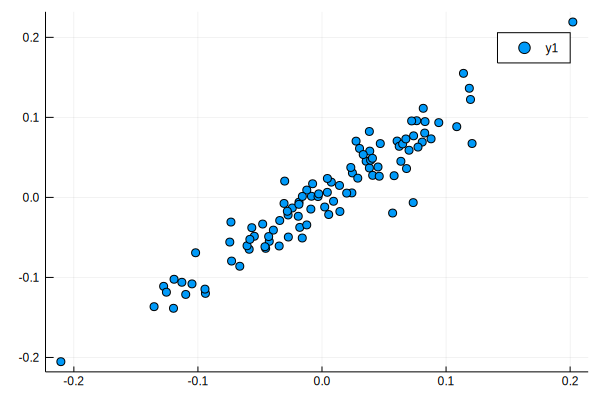

In [28]:
ls1 = scatter(g, ghat)

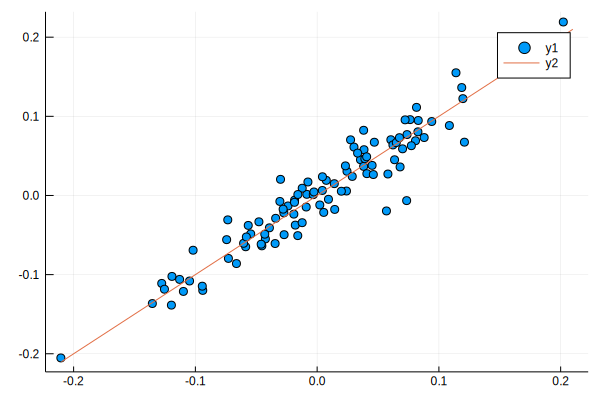

In [29]:
plot!(ls1, [-0.21, 0.21], [-0.21, 0.21], color=2)

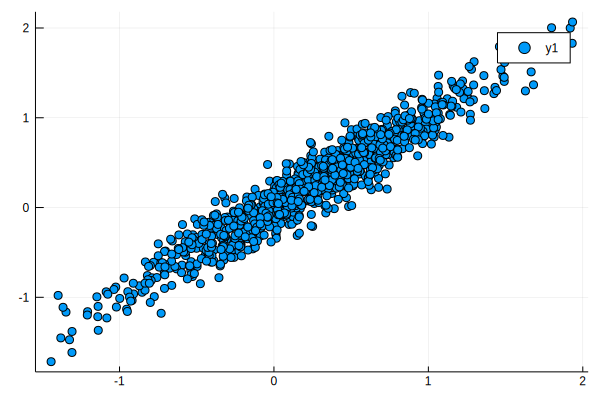

In [32]:
ls2 = scatter(tbv, ebv)

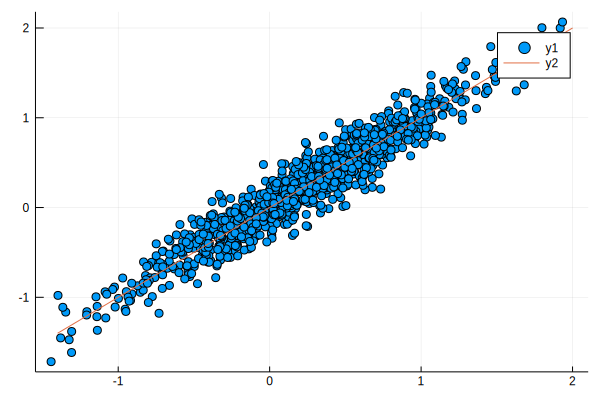

In [33]:
plot!(ls2, [-1.4, 2], [-1.4, 2], color=2)

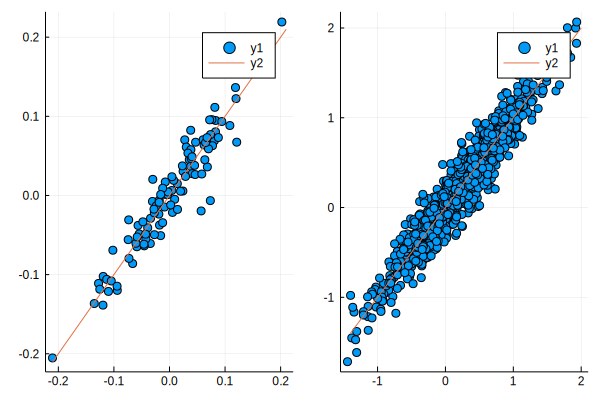

In [34]:
plot(ls1, ls2, layout=(1,2))

如果有新个体的基因型，但是表现型还没来得及表达：

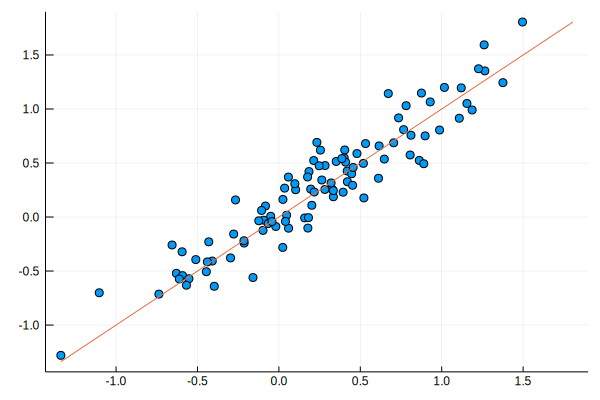

In [53]:
X2 = rand(0:2, 100, nlc)
tbv2 = X2*g
ebv2 = X2*ghat
scatter(tbv2, ebv2)
LR = [minimum([tbv2; ebv2]), maximum([tbv2; ebv2])]
plot!(LR, LR, color=2, leg=false)

# 根据系谱模拟育种值和表现型

In [54]:
using DelimitedFiles, SparseArrays

In [55]:
# The pedigree
# git clone https://github.com/xijiang/Breeding
ped = [0 0; 0 0; 0 1; 2 1; 4 3; 4 1; 6 5]

7×2 Array{Int64,2}:
 0  0
 0  0
 0  1
 2  1
 4  3
 4  1
 6  5

In [57]:
@time begin
    println("Calculate the sparse matrix of A inverse")
    D   = readdlm("D.vec")[:,1]
    tmp = readdlm("T.mat")
    T   = sparse(Int.(tmp[:,1]), Int.(tmp[:,2]), tmp[:,3])

    Ai = T'Diagonal(D)T
end;

Calculate the sparse matrix of A inverse
  0.000621 seconds (120 allocations: 89.766 KiB)


In [64]:
# 一个笨模拟
σa = σe = √.5
err = randn(7).*σe
tbv = zeros(7)
tbv[1] = randn()*σa
tbv[2] = randn()*σa
tbv[3] = tbv[1]/2 + randn()*σa*√(.75)
tbv[4] = (tbv[1] + tbv[2])/2 + randn()σa*√(.5)
tbv[5] = (tbv[3] + tbv[4])/2 + randn()σa*√(.5)
tbv[6] = (tbv[1] + tbv[4])/2 + randn()σa*√(.5)
tbv[7] = (tbv[5] + tbv[6])/2 + randn()σa*√(.5)
phenotype = tbv+err

7-element Array{Float64,1}:
 -0.2111460841540081
  1.389823108519595 
 -0.6201583356651411
 -0.4930336221880856
 -0.6208907309341042
 -1.9804633918537469
 -1.5324442614375366

In [65]:
for i in 1:7
    println(i, '\t', ped[i, :], '\t', tbv[i], '\t', phenotype[i])
end

1	[0, 0]	-0.47936049367859235	-0.2111460841540081
2	[0, 0]	0.7454654721475661	1.389823108519595
3	[0, 1]	0.15692963280742522	-0.6201583356651411
4	[2, 1]	-0.5446103876479842	-0.4930336221880856
5	[4, 3]	0.024724468166582025	-0.6208907309341042
6	[4, 1]	-0.7762031175367039	-1.9804633918537469
7	[6, 5]	-0.7719469688278877	-1.5324442614375366


- 混合线性模型
$$\mathbf{y} = \mathbf{1}\mu + \mathbf{Zu} + \mathbf{e}$$

- 混合线性模型方程组
$$\begin{bmatrix}\mathbf{X}'\mathbf{X} & \mathbf{X}'\mathbf{Z}\\
  \mathbf{Z}'\mathbf{X} & \mathbf{Z}'\mathbf{Z}+\mathbf{A}^{-1}\lambda\end{bmatrix}
  \begin{bmatrix}
  \hat{\mathbf{b}}\\\mathbf{\hat{\mathbf{u}}}
  \end{bmatrix}= \begin{bmatrix}\mathbf{X}'\mathbf{y}\\\mathbf{Z}'\mathbf{y}\end{bmatrix}$$

In [67]:
# BLUP
λ = σe^2/σa^2
lhs = [7 ones(7)'; ones(7) I+Ai.*λ]
rhs = [sum(phenotype); phenotype]
ebv = lhs\rhs

8-element Array{Float64,1}:
 -0.16428350989658735
 -0.5147740178622886 
  0.6043455245754558 
 -0.3917442690012316 
 -0.30062981590868726
 -0.46119949911397234
 -0.9554003023742056 
 -0.8989263687519862 

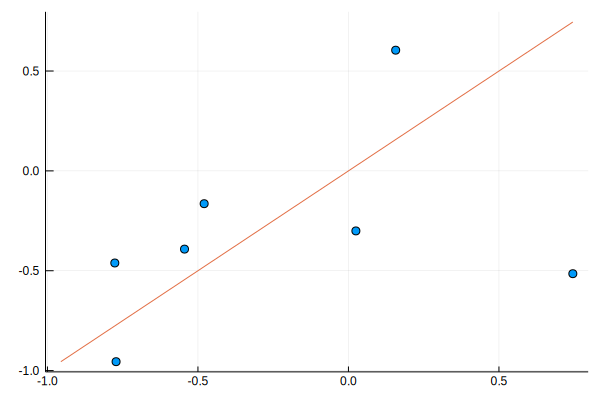

In [74]:
scatter(tbv, ebv, leg=false)
mmx = [minimum([tbv; ebv]), maximum([tbv; ebv])]
plot!(mmx, mmx, color=2, leg=false)

## SNP-BLUP 一例

### 模型

$$\mathbf{y} = \mathbf{1}_n\mu+\mathbf{Zg} + \mathbf{e}$$

### 混合线性模型方程组
$$\begin{bmatrix} \mathbf{1}'_n\mathbf{1} & \mathbf{1}'\mathbf{Z}\\
\mathbf{Z}'\mathbf{1} & \mathbf{Z}'\mathbf{Z}+\mathbf{I}\lambda\end{bmatrix}
\begin{bmatrix}\hat{\mu}\\\hat{\mathbf{g}}\end{bmatrix}
=\begin{bmatrix}\mathbf{1}'\mathbf{y}\\\mathbf{Z}'\mathbf{y}\end{bmatrix}$$

In [85]:
y = [5, 6, 10, 15]
Zt = [2 1 0 0 0 0; 1 1 0 1 0 0; 1 0 2 2 2 1; 0 1 1 2 2 2]
Zv = [0 0 2 1 1 1; 0 0 1 2 2 2]

2×6 Array{Int64,2}:
 0  0  2  1  1  1
 0  0  1  2  2  2

假定

$$\sigma_a^2=1 \Rightarrow \sigma_g^2=\frac{1}{6}$$

假定

$$\sigma_e^2 = 1$$

In [87]:
r1 = sum(Z, dims=1)
λ = 1/(1/6)
lhs = [4 r1; r1' Zt'Zt+I.*λ]
rhs = [sum(y); Z'y]
ghat = lhs\rhs

7-element Array{Float64,1}:
  7.260414004600051  
 -0.6662407360081779 
  0.11014566828520242
  0.272936365959621  
  0.5560950677229753 
  0.7661640684896499 
  0.8763097367748526 

In [88]:
gebv = [ones(2) Zv]ghat

2-element Array{Float64,1}:
 10.00485560950677
 11.93048811653463

## G-BLUP
### 模型

$$\mathbf{y} = \mathbf{1}\mu + \mathbf{Wa} + \mathbf{e}$$

由于已经假定 $\mathbf{a=Zg}$，而且 $\mathbf{Z} = \begin{bmatrix}\mathbf{Z}_t\\\mathbf{Z}_v\end{bmatrix}$，和 $\mathbf{a} =\begin{bmatrix}\mathbf{a}_t\\\mathbf{a}_v\end{bmatrix}$

$$\Rightarrow\mathbf{a}\sim\mathrm{MVN}(\mathbf{0},\,\mathbf{G}\sigma^2_g)$$

$\mathbf{G=ZZ}'$, $\mathbf{W} = [\mathbf{I}_n\,\mathbf{0}]$

### 混合线性模型方程组

$$\begin{bmatrix}\mathbf{1}'_n\mathbf{1} & \mathbf{1}'\mathbf{W}\\
\mathbf{W}'\mathbf{1} & \mathbf{W}'\mathbf{W}+\lambda\mathbf{G}^{-1}\end{bmatrix}
\begin{bmatrix}\hat{\mu}\\ \hat{\mathbf{a}}\end{bmatrix}
=\begin{bmatrix}\mathbf{1}'\mathbf{y}\\ \mathbf{W}'\mathbf{y}\end{bmatrix}$$

In [108]:
Z = [Zt; Zv]
p = sum(Z, dims=1)/12
scale = sum(p.*(1 .-p))*2
G = Z*Z'./scale

6×6 Array{Float64,2}:
 1.81818   1.09091   0.727273  0.363636  0.0       0.0     
 1.09091   1.09091   1.09091   1.09091   0.363636  0.727273
 0.727273  1.09091   5.09091   4.36364   3.27273   4.36364 
 0.363636  1.09091   4.36364   5.09091   2.90909   4.72727 
 0.0       0.363636  3.27273   2.90909   2.54545   2.90909 
 0.0       0.727273  4.36364   4.72727   2.90909   4.72727 

In [109]:
W = [I zeros(4, 2)]
λ = 1
lhs = [4 ones(4)'W; W'ones(4) W'W + λ.*inv(G)]
rhs = [sum(y); W'y]
a = lhs\rhs

7-element Array{Float64,1}:
  6.90453353795         
 -1.5085363514291208    
 -3.3446049277410726e-15
  3.8508856064965804    
  6.039516593132548     
  3.1797429503165207    
  5.764818722424705     

In [110]:
println(a[1]+a[6])
println(a[1]+a[7])

10.084276488266521
12.669352260374705


In [102]:
Z = Z .- (2 .*p)
G = Z*Z'/6
lhs = [4 ones(4)'W; W'ones(4) W'W + λ.*inv(G)]
rhs = [sum(y); W'y]
a = lhs\rhs

7-element Array{Float64,1}:
 14.446843853820468 
 -8.408765652951557 
 -7.186429849220399 
 -3.7859698441092644
 -2.406210069000651 
 -4.4419882443136665
 -2.516355737285837 

In [106]:
println(a[1]+a[6])
println(a[1]+a[7])

10.084276488266521
12.669352260374705
